In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import os,sys
import h5py, json
import pickle as pkl
import time

import nept
sys.path.append('../PreProcessing/')
sys.path.append('../TrackingAnalyses/')
sys.path.append('../Lib/')
sys.path.append('../Analyses/')

from importlib import reload  # Python 3.4+ only.
import pre_process_neuralynx as PPN
import TreeMazeFunctions as TMF
import spike_functions as SF
import spatial_tuning as ST
import stats_functions as StatsF
import plot_functions as PF
import zone_analyses_session as ZA
import analyses_table as AT

In [3]:
oakPaths = AT.getOakPaths()

In [20]:
# behavioral
All_BehDat = pd.read_csv(oakPaths['Analyses'] / 'TaskBehavior.csv',index_col=0)
All_BehDat = All_BehDat.set_index('se')

Index(['Li_T3g_052918', 'Li_T3g_053018', 'Li_T3g_053118', 'Li_T3g_060118',
       'Li_T3g_060418', 'Li_T3g_061318', 'Li_T3g_061518', 'Li_T3g_061818',
       'Li_T3g_062018', 'Li_T3g_062518', 'Li_T3g_062618', 'Li_T3g_062718',
       'Li_T3g_070618', 'Li_T3g_070918', 'Li_T3g_071018', 'Li_T3g_072518',
       'Li_T3g_072618', 'Li_T3g_073018', 'Li_T3g_080618', 'Li_T3g_080718',
       'Li_T3i_060518', 'Li_T3i_060618', 'Li_T3i_061118', 'Ne_T3g_052918',
       'Ne_T3g_060418', 'Ne_T3g_061218', 'Ne_T3g_061818', 'Ne_T3g_062018',
       'Ne_T3g_070918', 'Ne_T3i_060518', 'Ne_T3i_060618', 'Ne_T3i_061118',
       'Ne_T3i_062918', 'Ne_T3i_070218', 'Ne_T3i_071018', 'Ne_T3i_072518',
       'Ne_T3i_072618', 'Ne_T3i_073018', 'Ne_T3i_080118', 'Ne_T3i_080318',
       'Cl_T3g_010619', 'Cl_T3g_010819', 'Cl_T3g_010919', 'Cl_T3g_011619',
       'Cl_T3g_011719', 'Cl_T3g_011819', 'Cl_T3g_012219', 'Cl_T3g_012419',
       'Cl_T3g_012919', 'Cl_T3g_013019', 'Cl_T3g_013119', 'Cl_T3g_020419',
       'Cl_T3g_020519', '

In [25]:
All_BehDat.head()

,an,task,nTrials,nDiscard,nCo,nInCo,nLD,nRD,nLC,nRC,nST,pCo,pCoST
se,,,,,,,,,,,,,
Li_T3g_052818,Li,T3g,38,22,27,11,16,22,19,19,21,0.710526,0.809524
Li_T3g_052918,Li,T3g,154,24,133,21,74,80,81,73,51,0.863636,0.862745
Li_T3g_053018,Li,T3g,121,24,98,23,36,85,55,66,49,0.809917,0.816327
Li_T3g_053118,Li,T3g,140,20,111,29,54,86,71,69,69,0.792857,0.840580
Li_T3g_060118,Li,T3g,159,16,134,25,70,89,79,80,63,0.842767,0.857143


In [3]:
# ZA=reload(ZA)
# SF=reload(SF)
# TMF=reload(TMF)
# task = 'T3g'
# overwrite=1

# animals = ['Cl']
# #allDat = {}

# for animal in animals:
#     CT_Path =  oakPaths['Clustered'] / animal / (animal+'_ClusteringSummary.json')
#     ZoneDat_Fn = oakPaths['Analyses'] / animal / ('{}_{}_ZoneAnalysesDat.pkl').format(animal,task)
#     plotSP = oakPaths['Analyses'] / animal / 'Plots'

#     with CT_Path.open() as f:
#         CT = json.load(f)

#     SessionList = []
#     SessionPaths = {}
#     ZoneDat = {}
#     cnt=0
#     if (not ZoneDat_Fn.exists()) | overwrite:
#         for se,v in CT['Sessions'].items():
#             if v:
#                 temp = se.split('_')
#                 if temp[1]==task:
#                     try:
#                         SessionList.append(se)
#                         SessionPaths[se]=ZA.getSessionPaths(oakPaths,se)
#                         ZoneDat[se]=ZA.zone_analyses(se,overwriteSpikes=overwrite,doPlots=0)
#                         #ZoneDat[se]=ZA.zone_analyses(se,overwrite=0,doPlots=1)
#                     except:
#                         print("Error processing session: {}".format(se))
#                         print ("Error", sys.exc_info()[0],sys.exc_info()[1],sys.exc_info()[2].tb_lineno)
#                     cnt+=1

#         ZoneDat['Sessions'] = SessionList
#         ZoneDat['SessionPaths'] = SessionPaths

#         with ZoneDat_Fn.open(mode='wb') as f:
#             pkl.dump(ZoneDat,f,pkl.HIGHEST_PROTOCOL)

#     else:
#         with ZoneDat_Fn.open(mode='rb') as f:
#             ZoneDat = pkl.load(f)
#     #allDat[animal] = ZoneDat

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [4]:
ZA=reload(ZA)
SF=reload(SF)
TMF=reload(TMF)
tasks = ['T3h','T3g','T3j','T3i']
overwriteAn=1
overwriteZoneFile =1 

animals = ['Li','Cl','Ne']
allDat = {}
    
for an in animals:
    
    fn = oakPaths['Root'] / (an+'_SessionPaths.pkl')
    with fn.open(mode="rb") as f:
        sePaths = pkl.load(f)

    CT_Path =  oakPaths['Clustered'] / an / (an+'_ClusteringSummary.json')
    ZoneDat_Fn = oakPaths['Analyses'] / an / ('{}_ZoneAnalysesDat.pkl').format(an)
    #plotSP = oakPaths['Analyses'] / animal / 'Plots'

    with CT_Path.open() as f:
        CT = json.load(f)
        
    SessionList = []
    SessionPaths = {}
    ZoneDat = {}
    cnt=0
    if (not ZoneDat_Fn.exists()) | overwriteAn:
        for se,v in CT['Sessions'].items():
            if v:
                temp = se.split('_')
                if temp[1] in tasks:
                    try:
                        SessionList.append(se)
                        #ZoneDat[se]=ZA.zone_analyses(sePaths[se],overwriteSpikes=overwrite,doPlots=0)
                        ZoneDat[se]=ZA.zone_analyses(sePaths[se],overwritePos=overwriteZoneFile,doPlots=0)
                    
                    except:
                        pass
                    #    print("Error processing session: {}".format(se))
                    #    print ("Error", sys.exc_info()[0],sys.exc_info()[1],sys.exc_info()[2].tb_lineno)
                    cnt+=1

        ZoneDat['Sessions'] = SessionList
        ZoneDat['SessionPaths'] = SessionPaths

        with ZoneDat_Fn.open(mode='wb') as f:
            pkl.dump(ZoneDat,f,pkl.HIGHEST_PROTOCOL)

    else:
        with ZoneDat_Fn.open(mode='rb') as f:
            ZoneDat = pkl.load(f)
    allDat[an] = ZoneDat


Starting Analyses for Sesssion Li_T3g_052818
Starting Zone Analyses.
Computing Position Data.
Smoothing track data completed: 10.07 s 
Resampling the Data to 0.02 seconds completed: 0.01 s 
Computing Event Data.
Comrrecting Positions with Event Info.
Creating Position Data Structure.
Converting Track x,y to TreeMaze Positions Completed: 3.86 s
Creating Position Matrix Completed : 0.00 s
Creating Segment Direction Matrix Complete: 1.20 s
Processing of Position Data Complete : 5.06 s
Behavioral Tracking Variables Computed and Saved.
Loading Binned Spikes...
Binned Spike Files Loaded.
Loading FRs ...
FR Loaded.
Zone Analyses Completed

Starting Analyses for Sesssion Li_T3g_052918
Starting Zone Analyses.
Computing Position Data.
Smoothing track data completed: 18.29 s 
Resampling the Data to 0.02 seconds completed: 0.02 s 
Computing Event Data.
Comrrecting Positions with Event Info.
Creating Position Data Structure.
Converting Track x,y to TreeMaze Positions Completed: 7.62 s
Creating Pos

In [5]:
allZoneDat_Fn = oakPaths['Analyses'] / 'ZoneAnalysesAllAnimals.pkl'
with allZoneDat_Fn.open(mode='wb') as f:
    pkl.dump(allDat,f,pkl.HIGHEST_PROTOCOL)


In [10]:
# with CT_Path.open() as f:
#     CT = json.load(f)
ZoneDat.keys()

dict_keys(['Ne_T3g_052918', 'Ne_T3g_053018', 'Ne_T3g_053118', 'Ne_T3g_060118', 'Ne_T3g_060418', 'Ne_T3g_061218', 'Ne_T3g_061518', 'Ne_T3g_061818', 'Ne_T3g_062018', 'Ne_T3g_062518', 'Ne_T3g_062618', 'Ne_T3g_062918', 'Ne_T3g_070518', 'Ne_T3g_070618', 'Ne_T3g_070918', 'Ne_T3g_071018', 'Ne_T3g_071118', 'Ne_T3g_072518', 'Ne_T3g_072618', 'Ne_T3g_073018', 'Ne_T3g_080118', 'Ne_T3g_080318'])

In [19]:
SessionList

[]

In [522]:
se = 'Li_T3g_062718'
ZoneDat[se]=ZA.zone_analyses(se,overwrite=1,doPlots=1)


Starting Analyses for Sesssion Li_T3g_062718
Starting Zone Analyses.
Computing Position Data.
Smoothing track data completed: 24.73 s 
Resampling the Data to 0.02 seconds completed: 0.02 s 
Converting Track x,y to TreeMaze Positions Completed: 10.24 s
Creating Position Matrix Completed : 10.27 s
Creating Segment Direction Matrix Complete: 8.58 s
Processing of Position Data Complete : 43.60 s
Computing Event Data.
Behavioral Tracking Variables Computed and Saved.
Loading Spikes...
Binned Spike Files Loaded.
Loading FRs ...
FR Loaded.


../Analyses/stats_functions.py:17: RuntimeWarning: divide by zero encountered in log2
  InfoMat = fr_map*loc_prob*np.log2(fr_map/meanFR)


Zone Analyses Completed



In [15]:
plotSP = oakPaths['Analyses'] / animal / 'Plots'
plotSP.mkdir(parents=True, exist_ok=True)


In [22]:
se = list(ZoneDat.keys()) [0]
ZonePairStr =ZoneDat[se]['ZonePairs_Str']


In [9]:
allDat.keys()

dict_keys(['Li', 'Cl', 'Ne'])

In [180]:
se = list(ZoneDat.keys()) [0]
ZonePairStr =ZoneDat[se]['ZonePairs_Str']
nPairs = len(ZonePairStr)
FRxZoneCorr=pd.DataFrame(np.zeros((0,nPairs)))
FRxZoneCorr.columns=ZonePairStr

UnitInfoFields = ['an','se','seNum','Unit','HalfCorr','HalfnRMSE','Si']
UnitInfo=pd.DataFrame(np.zeros((0,len(UnitInfoFields))))
UnitInfo.columns=UnitInfoFields

seCnt =0
unitCnt = 0
cellCnt=0
muaCnt=0
seV = []
seNumV = []
anV = []

uTypeV = []
siV =[]
halfCorrV =[]
halfnRMSEV = []
zcV =[]

pairsV=[]
unitIDV = []
unitSeIDV = []
for an in animals:
    for se,dat in allDat[an].items():
        if se[:2]==an:
            CellCorr = dat['FR_CorrZonePairs']['Cells']
            nSeCells = CellCorr.shape[0]
            MuaCorr = dat['FR_CorrZonePairs']['Mua']
            nSeMua = MuaCorr.shape[0]
            nSeUnits = nSeCells+nSeMua

            seV+=[se]*nPairs*nSeUnits
            seNumV+=[seCnt]*nSeUnits*nPairs
            anV +=[an]*nSeUnits*nPairs

            FRxZoneCorr=FRxZoneCorr.append(CellCorr)
            FRxZoneCorr=FRxZoneCorr.append(MuaCorr)
            zcV+=np.array(CellCorr).flatten().tolist()
            zcV+=np.array(MuaCorr).flatten().tolist()

            uTypeV+=['cell']*nSeCells*nPairs
            uTypeV+=['mua']*nSeMua*nPairs

            unitIDV+= (np.repeat(np.arange(nSeUnits),nPairs)+unitCnt).tolist()
            unitSeIDV += np.repeat(np.arange(nSeCells),nPairs).tolist()
            unitSeIDV += np.repeat(np.arange(nSeMua),nPairs).tolist()
            
            halfCorrV+=np.repeat(dat['ZoneStability']['Cells']['HalfCorr'],nPairs).tolist()
            halfCorrV+=np.repeat(dat['ZoneStability']['Mua']['HalfCorr'],nPairs).tolist()

            halfnRMSEV+=np.repeat(dat['ZoneStability']['Cells']['HalfnRMSE'],nPairs).tolist()
            halfnRMSEV+=np.repeat(dat['ZoneStability']['Mua']['HalfnRMSE'],nPairs).tolist()

            siV+=np.repeat(dat['SI_Zone']['Cells']['All'],nPairs).tolist()
            siV+=np.repeat(dat['SI_Zone']['Mua']['All'],nPairs).tolist()

            pairsV+=ZonePairStr*nSeUnits
            seCnt+=1
            unitCnt+=nSeUnits
            cellCnt+=nSeCells
            muaCnt+=nSeMua

FRxZoneCorr.reset_index(drop=True)

UnitInfoFields = ['zc','zcf','an','se','seNum','uType','unitID','se_uID','halfCorr','halfnRMSE','SI','zcPairs']
UnitInfo=pd.DataFrame(np.zeros((0,len(UnitInfoFields))))
UnitInfo.columns=UnitInfoFields

UnitInfo['zc'] =zcV
UnitInfo['zcf'] = np.arctanh(zcV)
UnitInfo['zcf'][np.abs(UnitInfo['zcf'])==np.inf]=np.nan

UnitInfo['an'] =anV
UnitInfo['se'] =seV
UnitInfo['seNum']=seNumV
UnitInfo['uType'] = uTypeV
UnitInfo['unitID'] = unitIDV
UnitInfo['se_uID'] = unitSeIDV
UnitInfo['halfCorr'] = halfCorrV
UnitInfo['halfnRMSE'] = halfnRMSEV
UnitInfo['SI'] = siV
UnitInfo['zcPairs'] = pairsV

StabUnitInfo = UnitInfo.loc[np.logical_and(UnitInfo['halfCorr']>0.5,~np.isnan(UnitInfo['zcf']))]
#FRCorrZPairs = pd.DataFrame((np.zeros(0,6)))
#list(ZoneDat[se].keys())
#ZoneDat[se]['FR_CorrZonePairs']['Cells']
#x=pd.DataFrame(np.zeros((0,5)))

In [178]:
#UnitInfo.iloc[0:10]
unitIDV

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 18,
 19,
 19,
 19,
 19,
 19,
 20,
 20,
 20,
 20,
 20,
 21,
 21,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 22,
 23,
 23,
 23,
 23,
 23,
 24,
 24,
 24,
 24,
 24,
 25,
 25,
 25,
 25,
 25,
 26,
 26,
 26,
 26,
 26,
 27,
 27,
 27,
 27,
 27,
 28,
 28,
 28,
 28,
 28,
 29,
 29,
 29,
 29,
 29,
 30,
 30,
 30,
 30,
 30,
 31,
 31,
 31,
 31,
 31,
 32,
 32,
 32,
 32,
 32,
 33,
 33,
 33,
 33,
 33,
 34,
 34,
 34,
 34,
 34,
 35,
 35,
 35,
 35,
 35,
 36,
 36,
 36,
 36,
 36,
 37,
 37,
 37,
 37,
 37,
 38,
 38,
 38,
 38,
 38,
 39,
 39,
 39,
 39,
 39,
 40,
 40,
 40,
 40,
 40,
 41,
 41,
 41,
 41,
 41,


In [175]:
np.repeat(np.arange(5),5)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4])

In [93]:
UnitInfo['unitID'].value_counts()

939    5
289    5
337    5
333    5
329    5
325    5
321    5
317    5
313    5
309    5
305    5
301    5
297    5
293    5
285    5
229    5
281    5
277    5
273    5
269    5
265    5
261    5
257    5
253    5
249    5
245    5
241    5
237    5
341    5
345    5
      ..
578    5
586    5
694    5
590    5
690    5
686    5
682    5
678    5
674    5
670    5
666    5
662    5
658    5
654    5
650    5
646    5
642    5
638    5
634    5
630    5
626    5
622    5
618    5
614    5
610    5
606    5
602    5
598    5
594    5
0      5
Name: unitID, Length: 941, dtype: int64

In [94]:
UnitInfo[UnitInfo['unitID']==240]

,zc,zcf,an,se,seNum,uType,unitID,halfCorr,halfnRMSE,SI,zcPairs
1200,0.695238,0.858024,Li,Li_T3g_062718,12,cell,240,0.695238,0.238403,-0.050794,H1-H2
1201,0.593308,0.682756,Li,Li_T3g_062718,12,cell,240,0.695238,0.238403,-0.050794,CL-CR
1202,0.200000,0.202733,Li,Li_T3g_062718,12,cell,240,0.695238,0.238403,-0.050794,CL-CO
1203,0.287085,0.295386,Li,Li_T3g_062718,12,cell,240,0.695238,0.238403,-0.050794,CR-CO
1204,-0.238095,-0.242754,Li,Li_T3g_062718,12,cell,240,0.695238,0.238403,-0.050794,In-Out


In [46]:
def zCorrPairBoxPlot(dat,ax):
   
    with sns.axes_style('whitegrid'):
        ax=sns.boxplot(x='zcPairs',y='zc',hue='uType',data=dat,ax=ax,color='lightgrey')
        ax.get_legend().remove()
        ax=sns.stripplot(x='zcPairs',y='zc',hue='uType',palette="Set2",data=dat,ax=ax,dodge=True,alpha=0.6)
        ax.set_ylim([-1.1,1.1])
        sns.despine(offset=10, trim=False,ax=ax)
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
        ax.grid(axis='both',color='grey',alpha=0.4)
        ax.set_ylabel(' Kendalls τ ')
        ax.set_xlabel(' Data Pairings ')
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[2:], labels[:2])


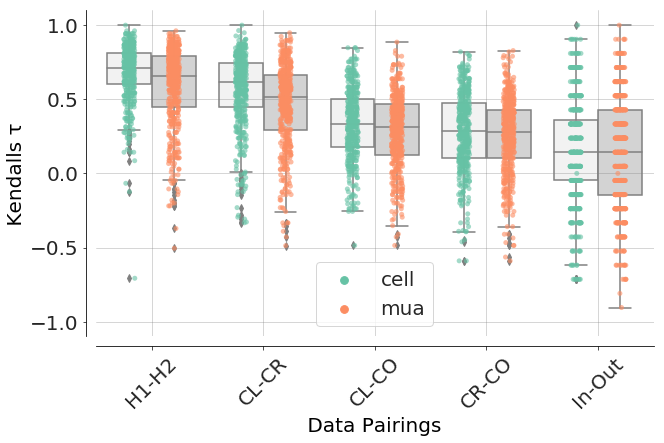

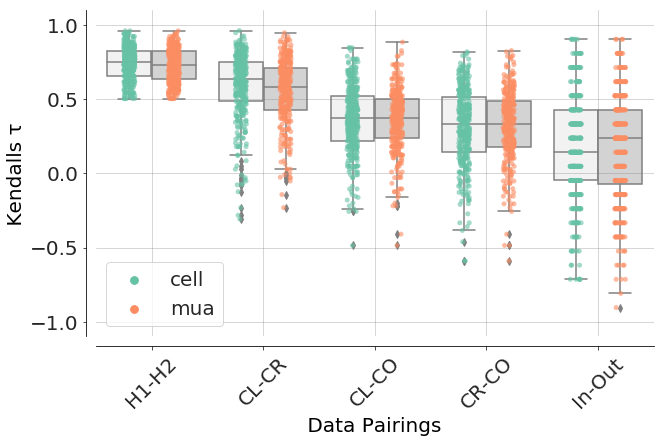

In [48]:
f,ax = plt.subplots(figsize=(10,6))
zCorrPairBoxPlot(UnitInfo,ax)
#f.savefig(plotSP / 'all_units_ZoneDatCorr.pdf', bbox_inches='tight',pad_inches=0.2)
f,ax = plt.subplots(figsize=(10,6))
zCorrPairBoxPlot(StabUnitInfo,ax)
#f.savefig(plotSP / 'stab_units_ZoneDatCorr.pdf', bbox_inches='tight',pad_inches=0.2)

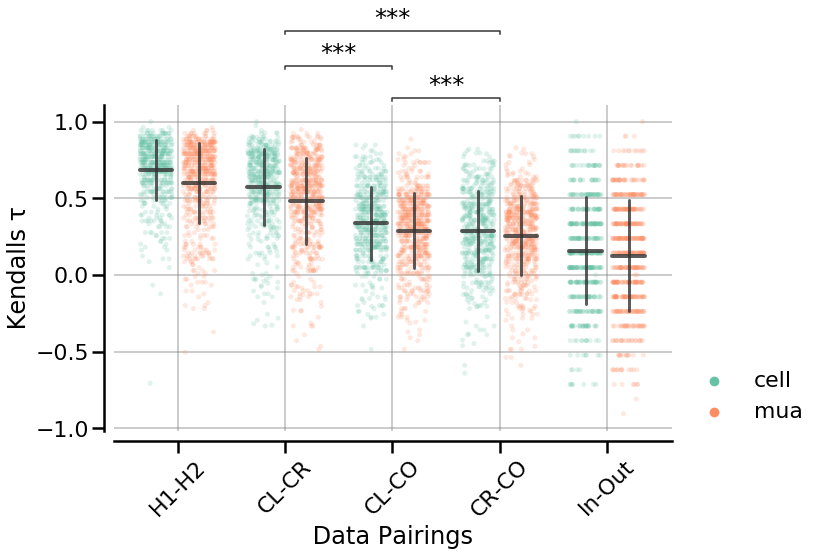

In [64]:
PF=reload(PF)

plotSP = Path('/mnt/c/Users/alexg8/Documents/SfN2019/Plots/')
dat = UnitInfo

means = dat.groupby(['uType','zcPairs']).mean()
means = means.reset_index()

sigma = dat.groupby(['uType','zcPairs']).std()
sigma = sigma.reset_index()

f,ax = plt.subplots(figsize=(10,6))


sns.set_context("poster")
sns.axes_style('whitegrid')
cols = sns.color_palette('Set2',2)
zcPairs = ['H1-H2','CL-CR','CL-CO','CR-CO','In-Out']

ax=sns.stripplot(x='zcPairs',y='zc',hue='uType',data=dat,dodge=True,alpha=0.2,jitter=0.3,palette="Set2",ax=ax)

PF.add_stat_annotation(ax, data=dat,x='zcPairs',y='zc',
                boxPairList=[ ("CL-CO","CR-CO"),("CL-CR","CL-CO"), ("CL-CR","CR-CO"),],
                    test='Mann-Whitney', textFormat='star', loc='outside', verbose=0,lineYOffsetToBoxAxesCoord=0.0, lineYOffsetAxesCoord=0.01,
                    lineHeightAxesCoord=0.01, textYOffsetPoints=0.0,  useFixedOffset=False,pvalueThresholds=[[1,"ns"], [0.05,"*"], [1e-2,"**"], [1e-3,"***"]])

ax.grid()
sns.despine(offset=10, trim=False,ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

ax.grid(axis='both',color='grey',alpha=0.4)
ax.set_ylabel(' Kendalls τ ')
ax.set_xlabel(' Data Pairings ')

l =ax.get_legend()
plt.legend(bbox_to_anchor=(1.02, 0), loc=3, borderaxespad=0.,frameon=False)
l.set_frame_on(False)

for ii in np.arange(5):
    
    subset = (means['uType']=='cell')&(means['zcPairs']==zcPairs[ii])
    m = means[subset]['zc'].values
    s = sigma[subset]['zc'].values
    
    ax.plot( [ii-0.2,ii-0.2], [m-s,m+s], linewidth=3,color='0.2',zorder=3,solid_capstyle='round',alpha=0.8)
    ax.plot( [ii-0.35,ii-0.05], [m,m], linewidth=4,color='0.2',zorder=3,solid_capstyle='round',alpha=0.8)

    subset = (means['uType']=='mua')&(means['zcPairs']==zcPairs[ii])
    m = means[subset]['zc'].values
    s = sigma[subset]['zc'].values
    
    ax.plot( [ii+0.2,ii+0.2], [m-s,m+s], linewidth=3,color='0.2',zorder=3,solid_capstyle='round',alpha=0.8)
    ax.plot( [ii+0.05,ii+0.35], [m,m], linewidth=4,color='0.2',zorder=3,solid_capstyle='round',alpha=0.8)

f.savefig(plotSP / 'all_units_ZoneDatCorr.svg', bbox_inches='tight', pad_inches=0.2)

In [70]:
len(dat['unitID'].unique())

1116

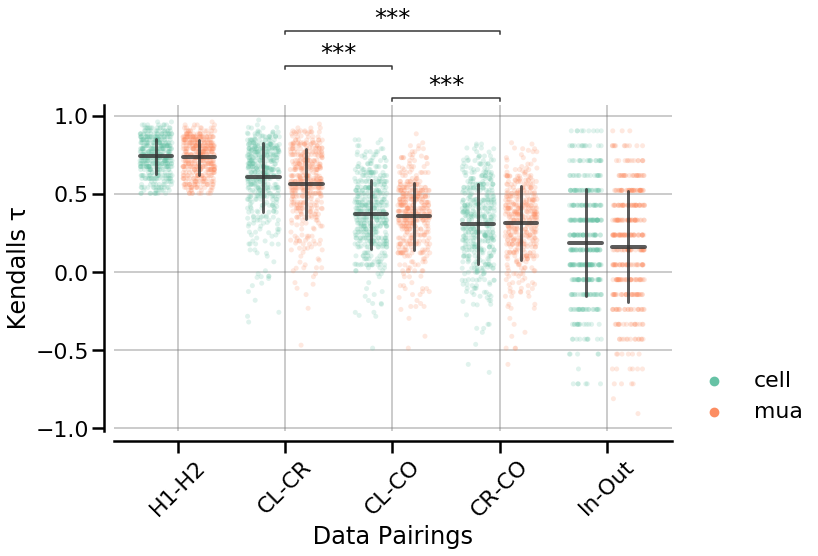

In [33]:
PF=reload(PF)

plotSP = Path('/mnt/c/Users/alexg8/Documents/SfN2019/Plots/')
dat = StabUnitInfo

means = dat.groupby(['uType','zcPairs']).mean()
means = means.reset_index()

sigma = dat.groupby(['uType','zcPairs']).std()
sigma = sigma.reset_index()

f,ax = plt.subplots(figsize=(10,6))


sns.set_context("poster")
sns.axes_style('whitegrid')
cols = sns.color_palette('Set2',2)
zcPairs = ['H1-H2','CL-CR','CL-CO','CR-CO','In-Out']

ax=sns.stripplot(x='zcPairs',y='zc',hue='uType',data=dat,dodge=True,alpha=0.2,jitter=0.3,palette="Set2",ax=ax)

PF.add_stat_annotation(ax, data=dat,x='zcPairs',y='zc',
                boxPairList=[ ("CL-CO","CR-CO"),("CL-CR","CL-CO"), ("CL-CR","CR-CO"),],
                    test='Mann-Whitney', textFormat='star', loc='outside', verbose=0,lineYOffsetToBoxAxesCoord=0.0, lineYOffsetAxesCoord=0.01,
                    lineHeightAxesCoord=0.01, textYOffsetPoints=0.0,  useFixedOffset=False,pvalueThresholds=[[1,"ns"], [0.05,"*"], [1e-2,"**"], [1e-3,"***"]])

ax.grid()
sns.despine(offset=10, trim=False,ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

ax.grid(axis='both',color='grey',alpha=0.4)
ax.set_ylabel(' Kendalls τ ')
ax.set_xlabel(' Data Pairings ')

l =ax.get_legend()
plt.legend(bbox_to_anchor=(1.02, 0), loc=3, borderaxespad=0.,frameon=False)
l.set_frame_on(False)

for ii in np.arange(5):
    
    subset = (means['uType']=='cell')&(means['zcPairs']==zcPairs[ii])
    m = means[subset]['zc'].values
    s = sigma[subset]['zc'].values
    
    ax.plot( [ii-0.2,ii-0.2], [m-s,m+s], linewidth=3,color='0.2',zorder=3,solid_capstyle='round',alpha=0.8)
    ax.plot( [ii-0.35,ii-0.05], [m,m], linewidth=4,color='0.2',zorder=3,solid_capstyle='round',alpha=0.8)

    subset = (means['uType']=='mua')&(means['zcPairs']==zcPairs[ii])
    m = means[subset]['zc'].values
    s = sigma[subset]['zc'].values
    
    ax.plot( [ii+0.2,ii+0.2], [m-s,m+s], linewidth=3,color='0.2',zorder=3,solid_capstyle='round',alpha=0.8)
    ax.plot( [ii+0.05,ii+0.35], [m,m], linewidth=4,color='0.2',zorder=3,solid_capstyle='round',alpha=0.8)

#f.savefig(plotSP / 'stable_units_ZoneDatCorr.svg', bbox_inches='tight', pad_inches=0.2)

plot for valid sessions

In [78]:
validSessions = All_BehDat[(All_BehDat['nTrials']>=100) & (All_BehDat['nInCo']>=25)].index.values
dat = UnitInfo[np.in1d(UnitInfo['se'].values,validSessions)]
len(dat['unitID'].unique())

477

In [74]:
len(validSessions)

49

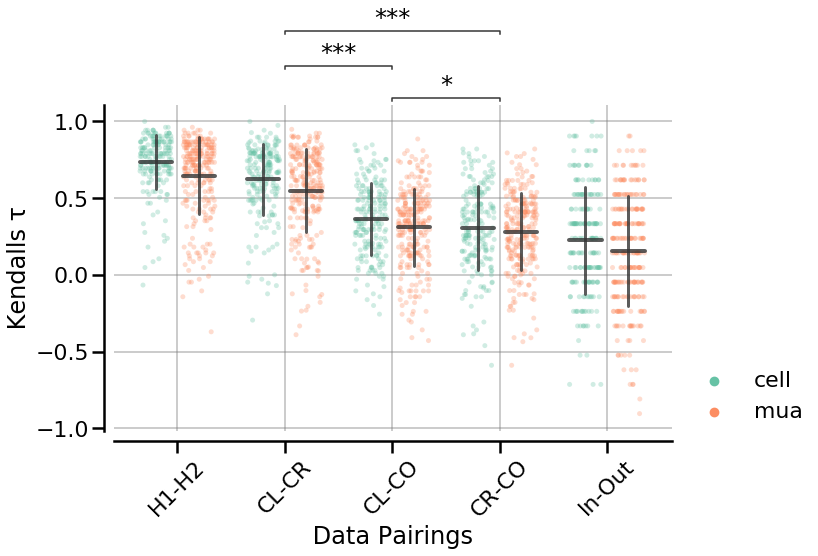

In [86]:
means = dat.groupby(['uType','zcPairs']).mean()
means = means.reset_index()

sigma = dat.groupby(['uType','zcPairs']).std()
sigma = sigma.reset_index()

f,ax = plt.subplots(figsize=(10,6))


sns.set_context("poster")
sns.axes_style('whitegrid')
cols = sns.color_palette('Set2',2)
zcPairs = ['H1-H2','CL-CR','CL-CO','CR-CO','In-Out']

ax=sns.stripplot(x='zcPairs',y='zc',hue='uType',data=dat,dodge=True,alpha=0.3,jitter=0.3,palette="Set2",ax=ax)

PF.add_stat_annotation(ax, data=dat,x='zcPairs',y='zc',
                boxPairList=[ ("CL-CO","CR-CO"),("CL-CR","CL-CO"), ("CL-CR","CR-CO"),],
                    test='Mann-Whitney', textFormat='star', loc='outside', verbose=0,lineYOffsetToBoxAxesCoord=0.0, lineYOffsetAxesCoord=0.01,
                    lineHeightAxesCoord=0.01, textYOffsetPoints=0.0,  useFixedOffset=False,pvalueThresholds=[[1,"ns"], [0.05,"*"], [1e-2,"**"], [1e-3,"***"]])

ax.grid()
sns.despine(offset=10, trim=False,ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

ax.grid(axis='both',color='grey',alpha=0.4)
ax.set_ylabel(' Kendalls τ ')
ax.set_xlabel(' Data Pairings ')

l =ax.get_legend()
plt.legend(bbox_to_anchor=(1.02, 0), loc=3, borderaxespad=0.,frameon=False)
l.set_frame_on(False)

for ii in np.arange(5):
    
    subset = (means['uType']=='cell')&(means['zcPairs']==zcPairs[ii])
    m = means[subset]['zc'].values
    s = sigma[subset]['zc'].values
    
    ax.plot( [ii-0.2,ii-0.2], [m-s,m+s], linewidth=3,color='0.2',zorder=3,solid_capstyle='round',alpha=0.8)
    ax.plot( [ii-0.35,ii-0.05], [m,m], linewidth=4,color='0.2',zorder=3,solid_capstyle='round',alpha=0.8)

    subset = (means['uType']=='mua')&(means['zcPairs']==zcPairs[ii])
    m = means[subset]['zc'].values
    s = sigma[subset]['zc'].values
    
    ax.plot( [ii+0.2,ii+0.2], [m-s,m+s], linewidth=3,color='0.2',zorder=3,solid_capstyle='round',alpha=0.8)
    ax.plot( [ii+0.05,ii+0.35], [m,m], linewidth=4,color='0.2',zorder=3,solid_capstyle='round',alpha=0.8)
#f.savefig(plotSP / 'stable_ZoneDatCorr_validSe.svg', bbox_inches='tight', pad_inches=0.2)

In [76]:
len(dat['unitID'].unique())

399

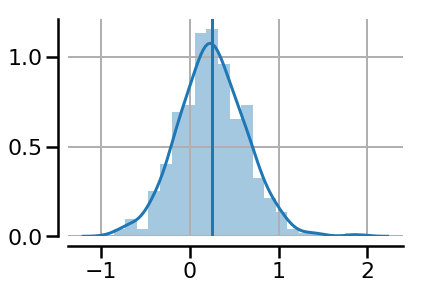

In [87]:
#dat = UnitInfo[np.in1d(UnitInfo['se'].values,validSessions)]
dat = StabUnitInfo[np.in1d(StabUnitInfo['se'].values,validSessions)]

subset1 =  (dat['zcPairs']=='H1-H2')
dat[subset1]['zcf']

subset2 =  (dat['zcPairs']=='CL-CR')
dat[subset2]['zcf']


#stats.ttest_rel(dat[subset1]['zcf'],dat[subset2]['zcf'])
y=dat[subset1]['zcf'].values-dat[subset2]['zcf'].values
y = y[~np.isnan(y)]
ax=sns.distplot(y)
ax.axvline(np.median(y))
ax.grid()
sns.despine(offset=10, trim=False,ax=ax)


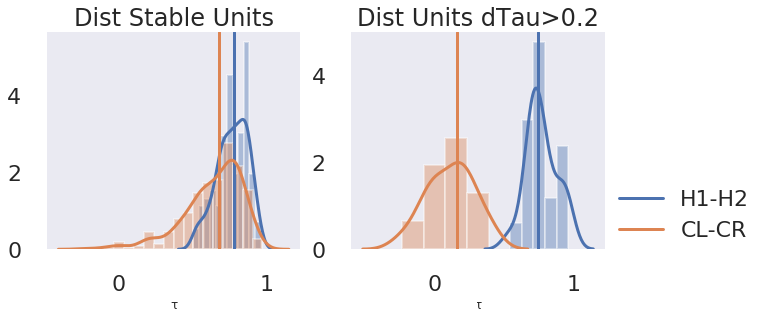

In [205]:
dat = StabUnitInfo[np.in1d(StabUnitInfo['se'].values,validSessions)]

subset1 =  (dat['zcPairs']=='H1-H2')
subset2 =  (dat['zcPairs']=='CL-CR')

x=dat[subset1]['zc'].values
y=dat[subset2]['zc'].values

zid=np.abs((x-y))>0.5
zid

f,a= plt.subplots(1,2,figsize=(10,4))
#sns.set()

sns.axes_style('whitegrid')
sns.set_context("poster")

ax = a[1]
ax = sns.distplot(x[zid],ax=ax)
ax.axvline(np.median(x[zid]),label = 'H1-H2')

ax = sns.distplot(y[zid],ax=ax)
ax.axvline(np.median(y[zid]),color=sns.color_palette()[1],label='CL-CR')

ax.grid()
ax.set_xlabel('τ')
sns.despine(offset=10, trim=False,ax=ax)
ax.set_title('Dist Units dTau>0.2')

ax = a[0]
ax = sns.distplot(x,ax=ax)
ax.axvline(np.median(x),label = 'H1-H2')

ax = sns.distplot(y,ax=ax)
ax.axvline(np.median(y),color=sns.color_palette()[1],label='CL-CR')
ax.set_title('Dist Stable Units')

ax.set_xlabel('τ')
ax.grid()
sns.despine(offset=10, trim=False,ax=ax)

a[1].legend()
l =a[1].get_legend()
plt.legend(bbox_to_anchor=(1.02, 0), loc=3, borderaxespad=0.,frameon=False)
l.set_frame_on(False)

#f.savefig(plotSP / 'RemmapedUnits_ZoneDatCorr_validSe.svg', bbox_inches='tight', pad_inches=0.2)

In [189]:
x=dat[subset1]['zc']
y=dat[subset2]['zc']
x-y

235    NaN
236    NaN
240    NaN
241    NaN
245    NaN
246    NaN
255    NaN
256    NaN
260    NaN
261    NaN
265    NaN
266    NaN
270    NaN
271    NaN
275    NaN
276    NaN
280    NaN
281    NaN
295    NaN
296    NaN
300    NaN
301    NaN
305    NaN
306    NaN
310    NaN
311    NaN
315    NaN
316    NaN
320    NaN
321    NaN
        ..
5490   NaN
5491   NaN
5495   NaN
5496   NaN
5500   NaN
5501   NaN
5505   NaN
5506   NaN
5510   NaN
5511   NaN
5515   NaN
5516   NaN
5520   NaN
5521   NaN
5525   NaN
5526   NaN
5530   NaN
5531   NaN
5535   NaN
5536   NaN
5540   NaN
5541   NaN
5545   NaN
5546   NaN
5550   NaN
5551   NaN
5555   NaN
5556   NaN
5560   NaN
5561   NaN
Name: zc, Length: 796, dtype: float64

In [211]:
y=dat[subset2]['zc']
dat.loc[y[zid].index.values]['se'].unique()

array(['Li_T3g_053118', 'Li_T3g_060118', 'Li_T3g_062018', 'Li_T3g_062718',
       'Li_T3g_070618', 'Li_T3g_073018', 'Li_T3i_060518', 'Cl_T3g_010819',
       'Cl_T3g_011619', 'Cl_T3g_012919'], dtype=object)

In [215]:
se = 'Cl_T3g_010819'
x=dat[subset1]['zc']
y=dat[subset2]['zc']
validCells = dat.loc[y[zid].index.values]
validCells[validCells['se']==se]

,zc,zcf,an,se,seNum,uType,unitID,se_uID,halfCorr,halfnRMSE,SI,zcPairs
2636,-0.028571,-0.028579,Cl,Cl_T3g_010819,34,cell,527,1,0.619048,0.133533,-0.076765,CL-CR


In [216]:
an = se[0:2]
fn = oakPaths['Root'] / (an+'_SessionPaths.pkl')
with fn.open(mode="rb") as f:
    sePaths = pkl.load(f)
        

In [217]:
ZA = reload(ZA)
ZoneDat[se]=ZA.zone_analyses(sePaths[se],overwritePos=0,doPlots=1)



Starting Analyses for Sesssion Cl_T3g_010819
Zone Results Loaded
Loading Beh Tracking Data
Complete.
Loading Binned Spikes...
Binned Spike Files Loaded.
Loading FRs ...
FR Loaded.



In [163]:
if (not sePaths[se]['Cell_Bin_Spikes'].exists()) or 0:
    print('s')

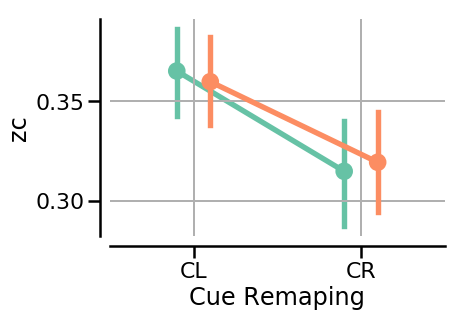

In [295]:
subset1 =  (dat['zcPairs']=='CL-CO') | (dat['zcPairs']=='CR-CO')
y = dat[subset1][['zc','zcPairs','uType','unitID']]

#y = pd.DataFrame(np.array((dat[subset1]['zcf'].values,dat[subset2]['zcf'].values)).T,columns=['CL','CR'])
sns.axes_style('whitegrid')

f,ax= plt.subplots()
ax=sns.pointplot(x='zcPairs',y='zc',hue='uType',dodge=0.2,data=y,palette='Set2',ax=ax)
#ax=sns.lineplot(x='zcPairs',y='zc',hue='uType',units='unitID',alpha=0.05,estimator=None,data=y,palette='Set2')

ax.get_legend().remove()
ax.grid()
sns.despine(offset=10, trim=False,ax=ax)
ax.set_xticklabels(['CL','CR'])
ax.set_xlabel('Cue Remaping')
f.savefig(plotSP / 'stable_units_ZoneCorr_CL-CR.svg', bbox_inches='tight', pad_inches=0.2)

In [308]:

def mannwhitneyz(x,y):
    n1 = len(x)
    n2 = len(y)
    
    u,p=stats.mannwhitneyu(x,y)
    
    sigU = np.sqrt(  (n1*n2)*(n1+n2+1)/12 )
    
    mu = n1*n2/2
    
    z = (u-mu)/sigU

    f = u/(n1*n2)
    return u,z,f,p

subset1 =  (dat['zcPairs']=='CL-CO')
subset2 =  (dat['zcPairs']=='CR-CO')
u,z,f,p=mannwhitneyz(dat[subset2]['zcf'],dat[subset1]['zcf'])

print(u,z,f,p)


    
    


236371.0 -3.316690897244437 0.4496951248513674 0.0004547261354483241


pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



Text(0.5, 25.5, ' Data Pairings ')

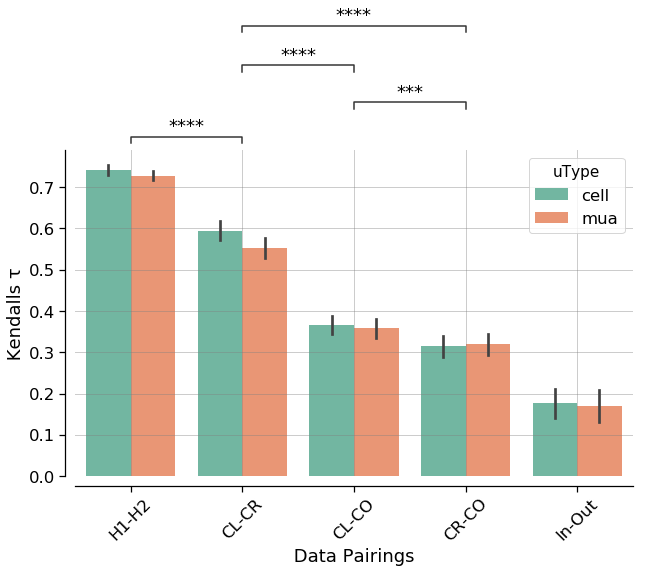

In [50]:
PF=reload(PF)
f,ax = plt.subplots(figsize=(10,6))
dat = StabUnitInfo
#sns.set()
sns.set_context("notebook", font_scale=1.5)
sns.axes_style('whitegrid')
#sns.catplot(x='zcPairs',y='zc',hue='uType',data=dat,kind='bar',palette="Set2",ax=ax)
ax=sns.barplot(x='zcPairs',y='zc',hue='uType',data=dat,palette="Set2",ax=ax)
PF.add_stat_annotation(ax, data=dat,x='zcPairs',y='zc',
                boxPairList=[("H1-H2","CL-CR"), ("CL-CO","CR-CO"),("CL-CR","CL-CO"), ("CL-CR","CR-CO"),],
                    test='Mann-Whitney', textFormat='star', loc='outside', verbose=1,lineYOffsetToBoxAxesCoord=0.1, lineYOffsetAxesCoord=0.02,
                    lineHeightAxesCoord=0.02, textYOffsetPoints=1,  useFixedOffset=True)
ax.grid()
sns.despine(offset=10, trim=False,ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.grid(axis='both',color='grey',alpha=0.4)
ax.set_ylabel(' Kendalls τ ')
ax.set_xlabel(' Data Pairings ')
#f.savefig(plotSP / 'stab_units_ZoneDatCorrBox.pdf', bbox_inches='tight',pad_inches=0.2)

In [686]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'font.size': 22})

In [220]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

md = smf.mixedlm("zcf ~ 0+zcPairs+uType", data=StabUnitInfo,groups=StabUnitInfo["se"])
mdf = md.fit()
print(mdf.summary())
print("R2 = {0:.3f}".format((np.corrcoef(mdf.fittedvalues,StabUnitInfo['zcf'])**2)[0,1]))
print(mdf.wald_test_terms())

          Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  zcf      
No. Observations:  3622     Method:              REML     
No. Groups:        84       Scale:               0.0960   
Min. group size:   5        Likelihood:          -984.7103
Max. group size:   115      Converged:           Yes      
Mean group size:   43.1                                   
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
zcPairs[CL-CO]   0.401    0.018 22.238 0.000  0.366  0.437
zcPairs[CL-CR]   0.713    0.018 39.471 0.000  0.677  0.748
zcPairs[CR-CO]   0.350    0.018 19.372 0.000  0.314  0.385
zcPairs[H1-H2]   0.991    0.018 54.853 0.000  0.955  1.026
zcPairs[In-Out]  0.203    0.018 11.224 0.000  0.167  0.238
uType[T.mua]    -0.041    0.011 -3.705 0.000 -0.062 -0.019
Group Var        0.013    0.008                           

R2 = 0.

In [115]:
subset1 =  (dat['zcPairs']=='CL-CO') | (dat['zcPairs']=='CR-CO')
y = dat[subset1][['zc','zcPairs','uType','unitID']]

zcPairs[CL-CO]     0.381168
zcPairs[CL-CR]     0.612456
zcPairs[CR-CO]     0.336096
zcPairs[H1-H2]     0.757593
zcPairs[In-Out]    0.199909
uType[T.mua]      -0.040662
Group Var          0.133052
dtype: float64

In [497]:
CenterSegs = ['Home','SegA','Center']
LeftSegs = ['SegE','I2','SegF','G3','SegG','G4']
RighSegs = ['SegB','I1','SegB','G1','SegC','G2']
ZoneDat[se]['FR_Zone']['Cells'][0][CenterSegs].loc[['All','CO','CL','CO']].T.mean()
ZoneDat[se]['FR_Zone']['Cells'][0][LeftSegs].loc[['All','CO','CL','CO']].T.mean()
ZoneDat[se]['FR_Zone']['Cells'][0][RighSegs].loc[['All','CO','CL','CO']].T.mean()

All    30.388325
CO     30.369983
CL     32.934814
CO     30.369983
dtype: float64

In [505]:
list(ZoneDat[se].keys())
len(ZoneDat[se]['unitIDs']['cells'])

10

In [15]:

LeftZ = ['SegE','I2','SegF','G3','SegG','G4']
#LeftZ = ['SegE','I2','SegF','SegG']

CenterZ = ['Home','SegA','Center']
RightZ = ['SegB','I1','SegB','G1','SegC','G2']
#RightZ = ['SegB','I1','SegB','SegC']


MaZones = ['LeftZ','RightZ']
nZ = len(MaZones)
Parts = ['CL','CR']
nP = len(Parts)

nReMe = nZ*nP

seCnt =0
unitCnt = 0

uTypeV = []
halfCorrV =[]
unitIDV = []

zoneV =[]
partV = []
frV = []
for se in SessionList:

    nSeCells = len(ZoneDat[se]['unitIDs']['cells'])
    nSeMua = len(ZoneDat[se]['unitIDs']['muas'])
    nSeUnits = nSeCells+nSeMua

    uTypeV+=['cell']*nSeCells*nReMe
    uTypeV+=['mua']*nSeMua*nReMe
    unitIDV+= (np.repeat(np.arange(nReMe),nSeUnits)+unitCnt).tolist()
    partV+=Parts*nZ*nSeUnits
    zoneV+=np.repeat(MaZones,nP).tolist()*nSeUnits
    
    halfCorrV+=np.repeat(ZoneDat[se]['ZoneStability']['Cells']['HalfCorr'],nReMe).tolist()
    halfCorrV+=np.repeat(ZoneDat[se]['ZoneStability']['Mua']['HalfCorr'],nReMe).tolist()
    
    for c in np.arange(nSeCells):
        frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c][CenterZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc[Parts]).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc[Parts]).T.mean().tolist()
    for c in np.arange(nSeMua):
        frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc[Parts]).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc[Parts]).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c][CenterZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc['All']).T.mean().tolist()
        
    seCnt+=1
    unitCnt+=nSeUnits
    cellCnt+=nSeCells
    muaCnt+=nSeMua

FRZoneInfoFields = ['fr','uType','unitID','halfCorr','Partition','Zone']
FRZoneInfo=pd.DataFrame(np.zeros((0,len(FRZoneInfoFields))))
FRZoneInfo.columns=FRZoneInfoFields

FRZoneInfo['fr'] =frV
FRZoneInfo['uType'] = uTypeV
FRZoneInfo['unitID'] = unitIDV
FRZoneInfo['halfCorr'] = halfCorrV
FRZoneInfo['Partition'] = partV
FRZoneInfo['Zone'] = zoneV


In [622]:
len(frV),len(uTypeV)

(1524, 1016)

Text(0.5, 25.200000000000003, ' Zones ')

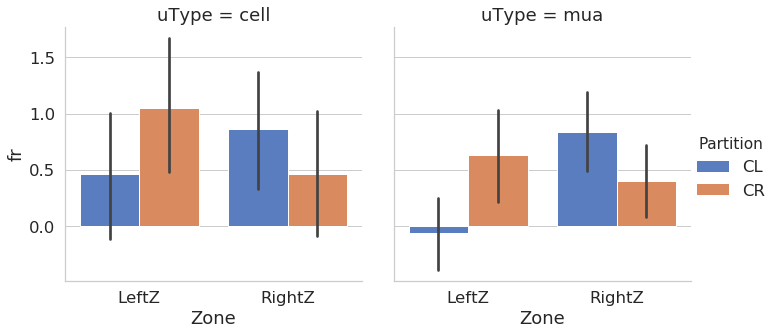

In [16]:
#f,ax = plt.subplots(figsize=(10,6))
#dat2 = FRZoneInfo.loc[FRZoneInfo['halfCorr']>0.5]
#dat = dat2
dat = FRZoneInfo
sns.set_style("whitegrid")
f=sns.catplot(x='Zone',y='fr',hue='Partition',data=dat,palette="muted",kind='bar',col='uType')
ax.grid()
sns.despine(offset=10, trim=False,ax=ax)
ax.grid(axis='both',color='grey',alpha=0.4)
ax.set_ylabel(' FR ')
ax.set_xlabel(' Zones ')
#f.savefig(plotSP / 'all_units_FRZoneNoGoalsAvgByCue.pdf', bbox_inches='tight',pad_inches=0.2)
#f.savefig(plotSP / 'all_units_FRZoneGoalsAvgByCue.pdf', bbox_inches='tight',pad_inches=0.2)

In [34]:
a=dat['fr'][ (dat['Zone']=='RightZ') & (dat['Partition']=='CL')]
b=dat['fr'][ (dat['Zone']=='RightZ') & (dat['Partition']=='CR')]

stats.ttest_rel(a,b)

Ttest_relResult(statistic=5.708093514145943, pvalue=2.0357652975349238e-08)

Text(0.5, 0, ' Zones ')

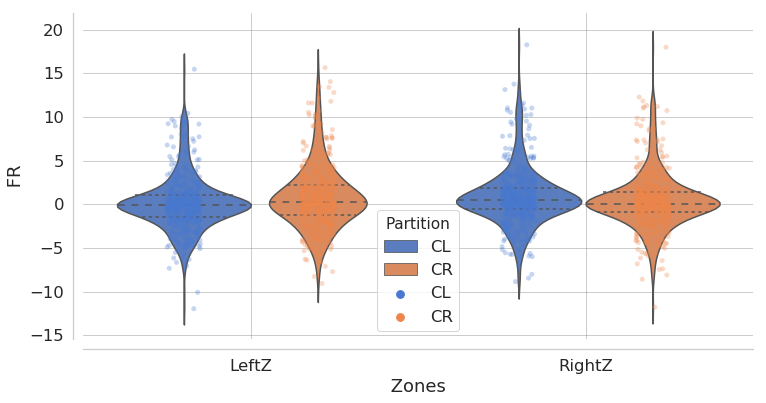

In [22]:
f,ax = plt.subplots(figsize=(12,6))
#dat2 = FRZoneInfo.loc[FRZoneInfo['halfCorr']>0.5]
#dat = dat2
dat = FRZoneInfo
sns.set_style("whitegrid")
sns.stripplot(x='Zone',y='fr',hue='Partition',data=dat,palette="muted",ax=ax,dodge=True,alpha=0.3)
sns.violinplot(x='Zone',y='fr',hue='Partition',data=dat,palette="muted",ax=ax,dodge=True,inner="quart",scale_hue=True)
ax.grid()
sns.despine(offset=10, trim=False,ax=ax)
ax.grid(axis='both',color='grey',alpha=0.4)
ax.set_ylabel(' FR ')
ax.set_xlabel(' Zones ')
#f.savefig(plotSP / 'all_units_FRZoneAvgByCye.pdf', bbox_inches='tight',pad_inches=0.2)

In [17]:

#dat2 = FRZoneInfo.loc[FRZoneInfo['halfCorr']>0.5]
dat2 = FRZoneInfo
md = smf.mixedlm("fr ~ 0+Partition*Zone+uType", data=dat2, groups=dat2["unitID"])
mdf = md.fit()
print(mdf.summary())
print("R2 = {0:.3f}".format((np.corrcoef(mdf.fittedvalues,dat2['fr'])**2)[0,1]))

NameError: name 'smf' is not defined

In [509]:
MaZones = ['LeftZ','CenterZ','RightZ']
nZ = 3
Parts = ['All','CO','CL','CO']
nP = 4

nReMe = nZ+nP

In [513]:
Parts*nZ*nSeUnits

['All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',

In [516]:
print(ZoneDat[se]['FR_Zone']['Cells'][0][CenterSegs].loc[Parts].T.mean().tolist())
print(ZoneDat[se]['FR_Zone']['Cells'][0][LeftSegs].loc[Parts].T.mean())
print(ZoneDat[se]['FR_Zone']['Cells'][0][RighSegs].loc[Parts].T.mean())

[25.357902738417852, 26.106310093124154, 24.75924888620811, 26.106310093124154]
All    29.894047
CO     30.263968
CL     30.300783
CO     30.263968
dtype: float64
All    30.388325
CO     30.369983
CL     32.934814
CO     30.369983
dtype: float64


In [650]:

#LeftZ = ['SegE','I2','SegF','G3','SegG','G4']
LeftZ = ['G3','G4']

CenterZ = ['Home','SegA','Center']
#RightZ = ['SegB','I1','SegB','G1','SegC','G2']
RightZ = ['G1','G2']


MaZones = ['LeftZ','RightZ']
nZ = len(MaZones)
Parts = ['CL','CR']
nP = len(Parts)

nReMe = nZ*nP

seCnt =0
unitCnt = 0

uTypeV = []
halfCorrV =[]
unitIDV = []

zoneV =[]
partV = []
frV = []
for se in SessionList:

    nSeCells = len(ZoneDat[se]['unitIDs']['cells'])
    nSeMua = len(ZoneDat[se]['unitIDs']['muas'])
    nSeUnits = nSeCells+nSeMua

    uTypeV+=['cell']*nSeCells*nReMe
    uTypeV+=['mua']*nSeMua*nReMe
    unitIDV+= (np.repeat(np.arange(nReMe),nSeUnits)+unitCnt).tolist()
    partV+=Parts*nZ*nSeUnits
    zoneV+=np.repeat(MaZones,nP).tolist()*nSeUnits
    
    halfCorrV+=np.repeat(ZoneDat[se]['ZoneStability']['Cells']['HalfCorr'],nReMe).tolist()
    halfCorrV+=np.repeat(ZoneDat[se]['ZoneStability']['Mua']['HalfCorr'],nReMe).tolist()
    
    for c in np.arange(nSeCells):
        frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c][CenterZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc[Parts]).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc[Parts]).T.mean().tolist()
    for c in np.arange(nSeMua):
        frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc[Parts]).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc[Parts]).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c][CenterZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc['All']).T.mean().tolist()
        
    seCnt+=1
    unitCnt+=nSeUnits
    cellCnt+=nSeCells
    muaCnt+=nSeMua

FRZoneInfoFields = ['fr','uType','unitID','halfCorr','Partition','Zone']
FRZoneInfo=pd.DataFrame(np.zeros((0,len(FRZoneInfoFields))))
FRZoneInfo.columns=FRZoneInfoFields

FRZoneInfo['fr'] =frV
FRZoneInfo['uType'] = uTypeV
FRZoneInfo['unitID'] = unitIDV
FRZoneInfo['halfCorr'] = halfCorrV
FRZoneInfo['Partition'] = partV
FRZoneInfo['Zone'] = zoneV


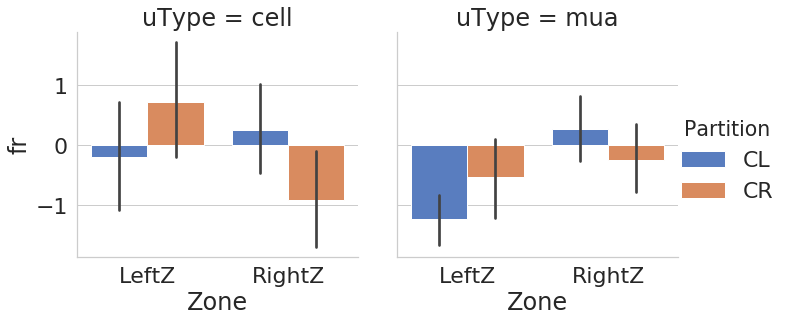

In [651]:
#f,ax = plt.subplots(figsize=(10,6))
#dat2 = FRZoneInfo.loc[FRZoneInfo['halfCorr']>0.5]
#dat = dat2
dat = FRZoneInfo
sns.set_style("whitegrid")
f=sns.catplot(x='Zone',y='fr',hue='Partition',data=dat,palette="muted",kind='bar',col='uType')
ax.grid()
sns.despine(offset=10, trim=False,ax=ax)
ax.grid(axis='both',color='grey',alpha=0.4)
ax.set_ylabel(' FR ')
ax.set_xlabel(' Zones ')
f.savefig(plotSP / 'all_units_FR_GoalsAvgByCue.pdf', bbox_inches='tight',pad_inches=0.2)

In [ ]:
FR_MajorZones = pd.DataFrame(np.zeros((0,len(Parts))))
UnitInfo.columns=UnitInfoFields

seCnt =0
unitCnt = 0
cellCnt=0
muaCnt=0
seV = []
seNumV = []

uTypeV = []
siV =[]
halfCorrV =[]
halfnRMSEV = []
zcV =[]

pairsV=[]
unitIDV = []
for se in SessionList:
    
    CellCorr = ZoneDat[se]['FR_CorrZonePairs']['Cells']
    nSeCells = CellCorr.shape[0]
    MuaCorr = ZoneDat[se]['FR_CorrZonePairs']['Mua']
    nSeMua = MuaCorr.shape[0]
    nSeUnits = nSeCells+nSeMua

    seV+=[se]*nSeUnits
    seNumV+=[seCnt]*nSeUnits
    
    uTypeV+=['cell']*nSeCells
    uTypeV+=['mua']*nSeMua
    
    unitIDV+= (np.arange(nSeUnits)+unitCnt).tolist()
    halfCorrV+=ZoneDat[se]['ZoneStability']['Cells']['HalfCorr'].tolist()
    halfCorrV+=ZoneDat[se]['ZoneStability']['Mua']['HalfCorr'].tolist()
    
    halfnRMSEV+=ZoneDat[se]['ZoneStability']['Cells']['HalfnRMSE'].tolist()
    halfnRMSEV+=ZoneDat[se]['ZoneStability']['Mua']['HalfnRMSE'].tolist()
    
    siV+=(ZoneDat[se]['SI_Zone']['Cells']['All'].tolist())
    siV+=(ZoneDat[se]['SI_Zone']['Mua']['All'].tolist())
    
    ZoneDat[se]['FR_Zone']['Cells'][0][CenterSegs].loc[Parts].T.mean()
    ZoneDat[se]['FR_Zone']['Cells'][0][LeftSegs].loc[Parts].T.mean()
    ZoneDat[se]['FR_Zone']['Cells'][0][RighSegs].loc[Parts].T.mean()
    
    seCnt+=1
    unitCnt+=nSeUnits
    cellCnt+=nSeCells
    muaCnt+=nSeMua


In [503]:
np.arange(nSeUnits)+10

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35])